# Data Exploration - Domestic Energy Ratings in England and Wales

The aim of this project is to look at the energy ratings (EPC) of domestic properties in England and Wales. I want to analyse this data and present it in an interactive format (with maps). 

If possible, I would like to perform some machine learning and perhaps create an output website where people can look up the ratings of their area and see the trends for future years.

The data is from the [UK Gov Live tables on Energy Performance of Buildings Certificates](https://www.gov.uk/government/statistical-data-sets/live-tables-on-energy-performance-of-buildings-certificates), table D3.


Steps:

In [8]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seasborn as sns

ModuleNotFoundError: No module named 'seasborn'

In [2]:
csv = 'dataset_2.csv'
data = pd.read_csv(csv)
df = pd.DataFrame(data)

In [3]:
df

,Local Authority Code,Local Authority,Quarter,Number of Lodgements,Total Floor Area (m2),A,B,C,D,E,F,G,Not recorded
0,E07000223,Adur,2008/4,523,"36,756",0,39,104,195,130,51,4.0,0.0
1,E07000223,Adur,2009/1,536,"40,605",0,51,102,169,167,45,2.0,0.0
2,E07000223,Adur,2009/2,543,"39,699",0,62,85,178,173,43,2.0,0.0
3,E07000223,Adur,2009/3,527,"38,287",0,33,75,197,174,46,2.0,0.0
4,E07000223,Adur,2009/4,426,"31,243",0,27,78,160,125,31,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19308,E06000014,York,2022/1,"1,261","110,074",18,178,301,534,178,50,2.0,0.0
19309,E06000014,York,2022/2,"1,282","110,194",3,89,301,557,209,116,7.0,0.0
19310,E06000014,York,2022/3,"1,356","115,469",11,156,338,592,213,40,6.0,0.0
19311,E06000014,York,2022/4,"1,437","118,357",35,95,468,598,200,33,8.0,0.0


In [4]:
#making column names simpler to use. Create list, fix, replace columns with new list.

cols = df.columns.to_list()

#cleaning column names

new_cols = []

for item in cols:
    item = item.lower()
    item = re.sub(' ','_', item)
    item = re.sub(r'\(','', item)
    item = re.sub(r'\)','', item)
    item = re.sub(r'/','', item)
    item = re.sub(r'£','', item)
    item = re.sub('__','_', item)
    new_cols.append(item)

df.columns = new_cols

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19313 entries, 0 to 19312
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   local_authority_code  19312 non-null  object 
 1   local_authority       19312 non-null  object 
 2   quarter               19312 non-null  object 
 3   number_of_lodgements  19312 non-null  object 
 4   total_floor_area_m2   19312 non-null  object 
 5   a                     19312 non-null  object 
 6   b                     19312 non-null  object 
 7   c                     19312 non-null  object 
 8   d                     19312 non-null  object 
 9   e                     19312 non-null  object 
 10  f                     19312 non-null  object 
 11  g                     19312 non-null  float64
 12  not_recorded          19312 non-null  float64
dtypes: float64(2), object(11)
memory usage: 1.9+ MB


In [5]:
#converting the number columns to floats
df.iloc[:,3:] = df.iloc[:,3:].replace(',','', regex=True).astype(float)

/var/folders/jb/5csh6qnx4y7brg28_7d39qyw0000gq/T/ipykernel_90124/273472227.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,3:] = df.iloc[:,3:].replace(',','', regex=True).astype(float)


In [6]:
#converting the quarter format to datetime
df['quarter'] = df['quarter'].replace('/', '-Q', regex=True)
df['quarter'] = pd.to_datetime(df['quarter'])

In [7]:
df = df.dropna()
df

,local_authority_code,local_authority,quarter,number_of_lodgements,total_floor_area_m2,a,b,c,d,e,f,g,not_recorded
0,E07000223,Adur,2008-10-01,523.0,36756.0,0.0,39.0,104.0,195.0,130.0,51.0,4.0,0.0
1,E07000223,Adur,2009-01-01,536.0,40605.0,0.0,51.0,102.0,169.0,167.0,45.0,2.0,0.0
2,E07000223,Adur,2009-04-01,543.0,39699.0,0.0,62.0,85.0,178.0,173.0,43.0,2.0,0.0
3,E07000223,Adur,2009-07-01,527.0,38287.0,0.0,33.0,75.0,197.0,174.0,46.0,2.0,0.0
4,E07000223,Adur,2009-10-01,426.0,31243.0,0.0,27.0,78.0,160.0,125.0,31.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19307,E06000014,York,2021-10-01,1152.0,93729.0,8.0,177.0,292.0,454.0,174.0,41.0,6.0,0.0
19308,E06000014,York,2022-01-01,1261.0,110074.0,18.0,178.0,301.0,534.0,178.0,50.0,2.0,0.0
19309,E06000014,York,2022-04-01,1282.0,110194.0,3.0,89.0,301.0,557.0,209.0,116.0,7.0,0.0
19310,E06000014,York,2022-07-01,1356.0,115469.0,11.0,156.0,338.0,592.0,213.0,40.0,6.0,0.0


In [10]:
total_las = len(df['local_authority'].unique())

print('Total Local Authorities = {}'.format(total_las))

Total Local Authorities = 343


In [38]:
band_cols = df.iloc[:,5:12].columns
band_cols

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

In [48]:
#2022_avg_bands
y_2022 = df[df['quarter'].dt.year == 2022]

avg_2022_bands = y_2022.groupby('local_authority')[band_cols].mean()
avg_2022_bands

,a,b,c,d,e,f,g
local_authority,,,,,,,
Adur,0.25,47.75,97.50,150.75,69.50,16.75,1.75
Allerdale,3.50,103.00,184.50,242.00,147.00,54.00,14.00
Amber Valley,11.25,156.50,194.00,298.50,175.25,48.75,4.25
Arun,8.50,277.25,320.00,482.25,250.00,57.75,7.00
Ashfield,8.50,133.25,203.00,321.50,155.75,33.50,6.00
...,...,...,...,...,...,...,...
Wrexham,4.75,74.00,213.75,280.50,144.25,40.25,7.50
Wychavon,26.50,197.50,372.00,450.50,148.75,56.25,6.25
Wyre,8.50,193.00,135.00,283.00,128.50,30.50,7.75


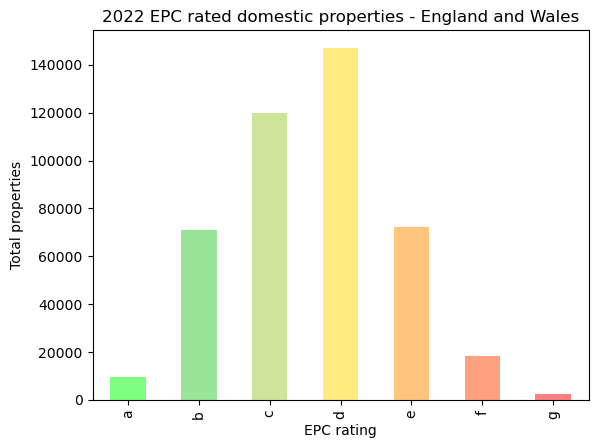

In [70]:
#2022_avg_bands
y_2022 = df[df['quarter'].dt.year == 2022]

avg_2022_bands = y_2022.groupby('local_authority')[band_cols].mean()
avg_2022_bands


#2008 avg bands
y_2008 = df[df['quarter'].dt.year == 2008]

avg_2008_bands = y_2008.groupby('local_authority')[band_cols].mean()
avg_2008_bands



ax1 = avg_2022_bands.sum().plot(kind='bar',
                                color = ['lime', 'limegreen', 'yellowgreen', 'gold'
                                         , 'darkorange', 'orangered','red'],
                               alpha = .5)
#ax2 = avg_2008_bands.sum().plot(kind='bar',
#                                color = ['lime', 'limegreen', 'yellowgreen', 'gold'
#                                        , 'darkorange', 'orangered','red'],
#                               alpha=.5)
plt.ylabel('Total properties')
plt.xlabel('EPC rating')
plt.title('2022 EPC rated domestic properties - England and Wales')
plt.show()